# 📌 Objective:
"""
Build a machine learning model to classify Instagram accounts into:
- Fake
- Spammer
- Genuine

using profile-based features like follower/following count, bio status, post count, etc.
"""

# 📊 Business Understanding:
"""
Fake and spam accounts negatively impact user trust, brand image, and platform quality.
This ML solution will help in:
- Automatic detection of fake/spam accounts.
- Improved moderation on social media platforms.
- Digital forensic investigation of suspicious behavior.
"""


There are few key input features which we considered to determine if the account is fake or not.

*   THE *INPUT FEATURES* ARE:


1.   **PROFILE PICTURE** - The user has profile picture or not.
2.   **NUMS/LENGTH USERNAM**E - The ratio of number of numerical chars in username to its length.
3.  **FULLNAME WORDS** - Full name in word tokens
4.   **NAME/LENGTH OF FULL NAME** - The ratio of number of numerical characters in full name to its length.
5.   **NAME == USERNAME** - Are username and full name literally the same?
6.   **DESCRIPTION LENGTH** - Bio length in characters.
7.   **EXTERNAL URL** - Has external URL or not.
8.   **PRIVATE** - Private or not.
9.   **POSTS** - Number of posts.
10.  **FOLLOWERS** - Number of followers.
11.  **FOLLOWS** - Number of follows.


**<h4> TRAINED DETECTOR MODEL:**

---
This model is trained such that it considers the above given features and determines whether a particular account is fake or not. By resulting the output as either 0 or 1 meaning TRUSTED or FAKE respectively. Our intention is to make this software capable of thinking like a human, based on the data it is given and results in maximum probability of success.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Load datasets
train_df = pd.read_csv(r"C:\Users\Aparna Mondal\Downloads\train.csv")
test_df = pd.read_csv(r"C:\Users\Aparna Mondal\Downloads\test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (576, 12)
Test shape: (120, 12)


In [5]:
train_df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [6]:
print("\nDataset Information:")
print(train_df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB
None


In [7]:
print("\nDataset Information:")
print(test_df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB
None


In [8]:
# Example: Check nulls
print(train_df.isnull().sum())

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


In [9]:
print(test_df.isnull().sum())

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


In [10]:
print("\nSummary Statistics:")
print(train_df.describe())


Summary Statistics:
       profile pic  nums/length username  fullname words  \
count   576.000000            576.000000      576.000000   
mean      0.701389              0.163837        1.460069   
std       0.458047              0.214096        1.052601   
min       0.000000              0.000000        0.000000   
25%       0.000000              0.000000        1.000000   
50%       1.000000              0.000000        1.000000   
75%       1.000000              0.310000        2.000000   
max       1.000000              0.920000       12.000000   

       nums/length fullname  name==username  description length  external URL  \
count            576.000000      576.000000          576.000000    576.000000   
mean               0.036094        0.034722           22.623264      0.116319   
std                0.125121        0.183234           37.702987      0.320886   
min                0.000000        0.000000            0.000000      0.000000   
25%                0.000000      

In [11]:
print("\nSummary Statistics:")
print(test_df.describe())


Summary Statistics:
       profile pic  nums/length username  fullname words  \
count   120.000000            120.000000      120.000000   
mean      0.758333              0.179917        1.550000   
std       0.429888              0.241492        1.187116   
min       0.000000              0.000000        0.000000   
25%       1.000000              0.000000        1.000000   
50%       1.000000              0.000000        1.000000   
75%       1.000000              0.330000        2.000000   
max       1.000000              0.890000        9.000000   

       nums/length fullname  name==username  description length  external URL  \
count            120.000000      120.000000          120.000000    120.000000   
mean               0.071333        0.041667           27.200000      0.100000   
std                0.209429        0.200664           42.588632      0.301258   
min                0.000000        0.000000            0.000000      0.000000   
25%                0.000000      

In [12]:
train_df.head()
train_df.info()
train_df.describe()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [13]:
test_df.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')

In [14]:
train_df.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')

In [19]:
#Number of unique values in the profile pic column
train_df['profile pic'].value_counts()

profile pic
1    404
0    172
Name: count, dtype: int64

In [20]:
#Number of accounts having an external URL
train_df['external URL'].value_counts()

external URL
0    509
1     67
Name: count, dtype: int64

In [16]:
test_df['fake'].value_counts()

fake
0    60
1    60
Name: count, dtype: int64

In [22]:
#Number of accounts having description length over 50
(train_df['description length'] > 50).sum()

98

In [15]:
# Corrected Feature Engineering: Follower-Following Ratio
train_df['ff_ratio'] = train_df['#followers'] / (train_df['#follows'] + 1)
test_df['ff_ratio'] = test_df['#followers'] / (test_df['#follows'] + 1)


In [16]:
# Binary features from existing columns
train_df['has_profile_pic'] = train_df['profile pic'].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)
train_df['has_bio'] = train_df['description length'].apply(lambda x: 1 if x > 0 else 0)


In [17]:

# Do the same for test_df
test_df['has_profile_pic'] = test_df['profile pic'].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)
test_df['has_bio'] = test_df['description length'].apply(lambda x: 1 if x > 0 else 0)


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['account_type'] = le.fit_transform(train_df['fake'])  # This assumes 'fake' has string labels

# Optional: Check label mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {0: 0, 1: 1}


In [19]:
test_df['account_type'] = le.transform(test_df['fake'])  # Only if test_df has the 'fake' label


In [20]:
# Adjusted column names to match actual DataFrame
drop_cols = ['profile pic', 'external URL']  # Assuming these are not useful after encoding
train_df.drop(columns=drop_cols, inplace=True, errors='ignore')
test_df.drop(columns=drop_cols, inplace=True, errors='ignore')


*   **<h2><i>Performing Exploratory Data Anlaysis For "Testing Dataset"**


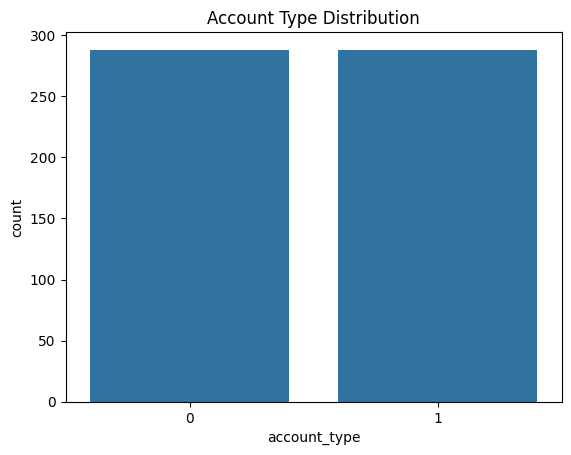

Unique encoded labels: [0 1]
Label classes from LabelEncoder: [0 1]


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='account_type', data=train_df)
plt.title("Account Type Distribution")

# Use dynamic ticks and labels from the label encoder
plt.xticks(ticks=range(len(le.classes_)), labels=le.classes_)

plt.show()
print("Unique encoded labels:", train_df['account_type'].unique())
print("Label classes from LabelEncoder:", le.classes_)




 **Class Balance (fake column)**

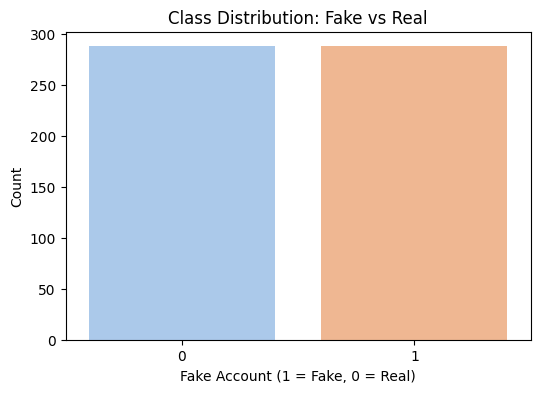

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='fake', data=train_df, palette='pastel')
plt.title("Class Distribution: Fake vs Real")
plt.xlabel("Fake Account (1 = Fake, 0 = Real)")
plt.ylabel("Count")
plt.show()


**Histograms of Numeric Features**

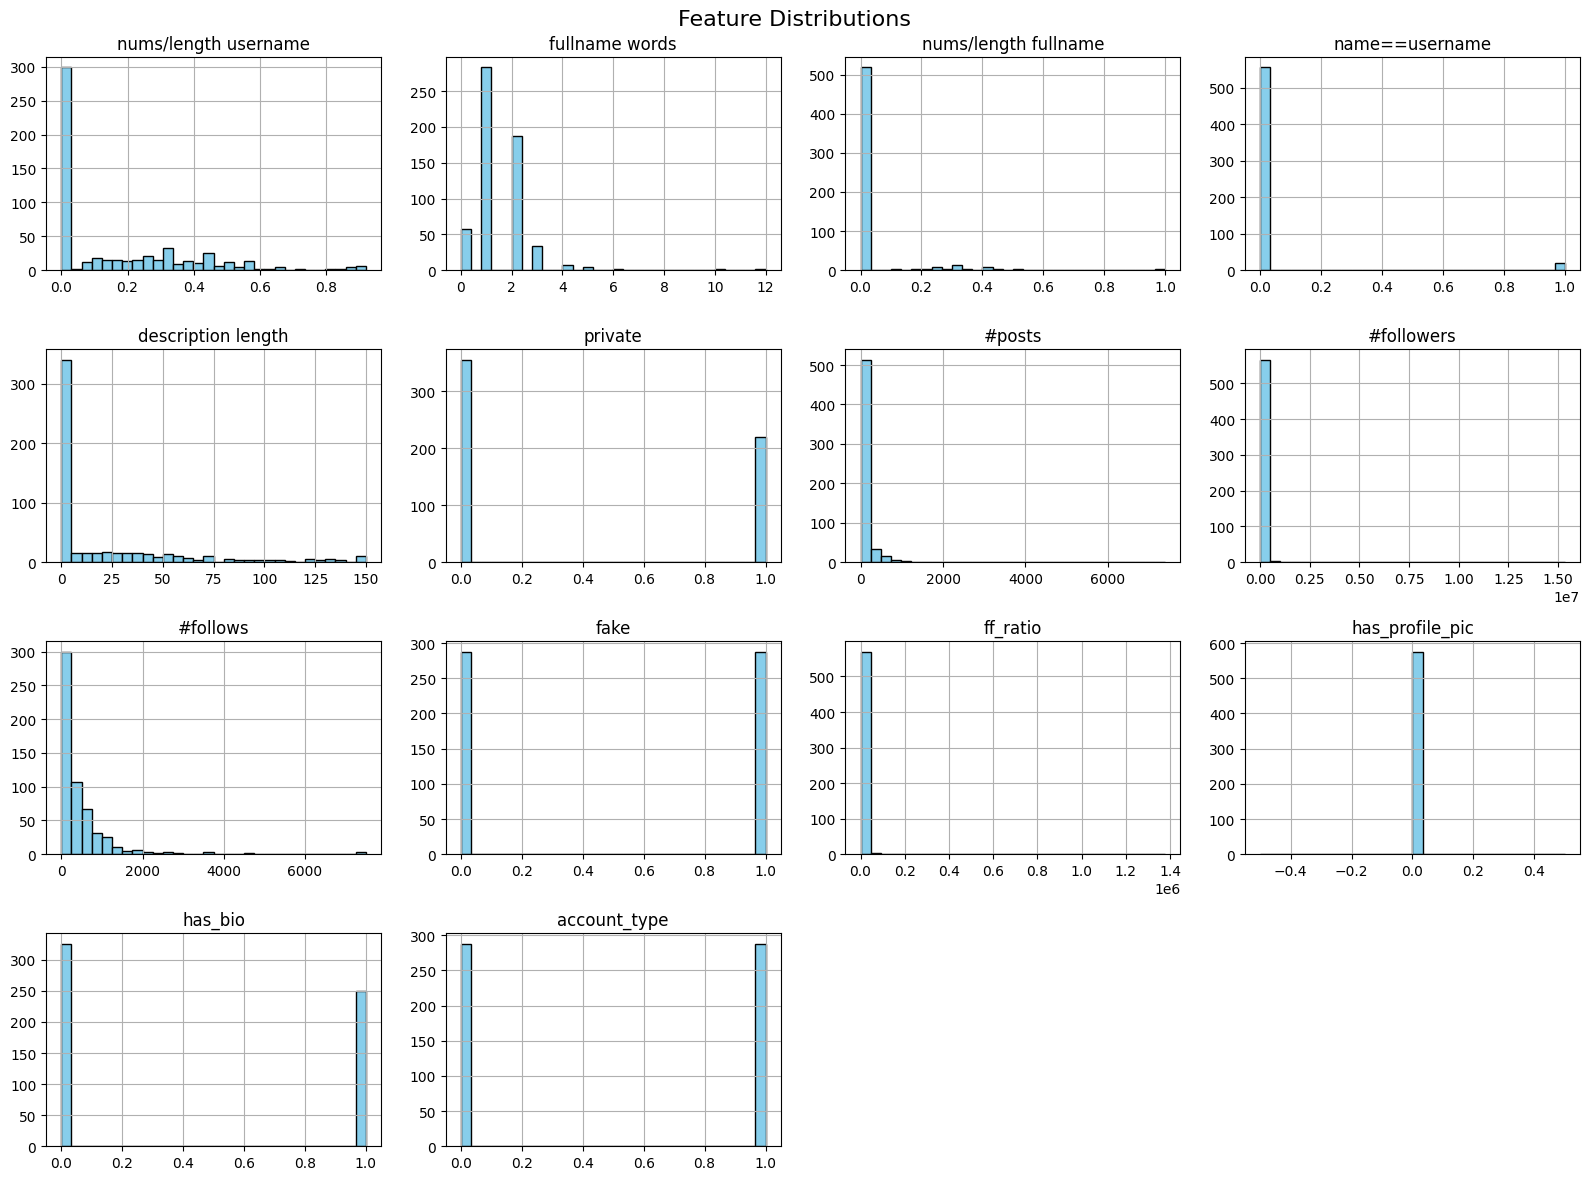

In [23]:
train_df.hist(figsize=(16, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


**Boxplots to Spot Outliers**

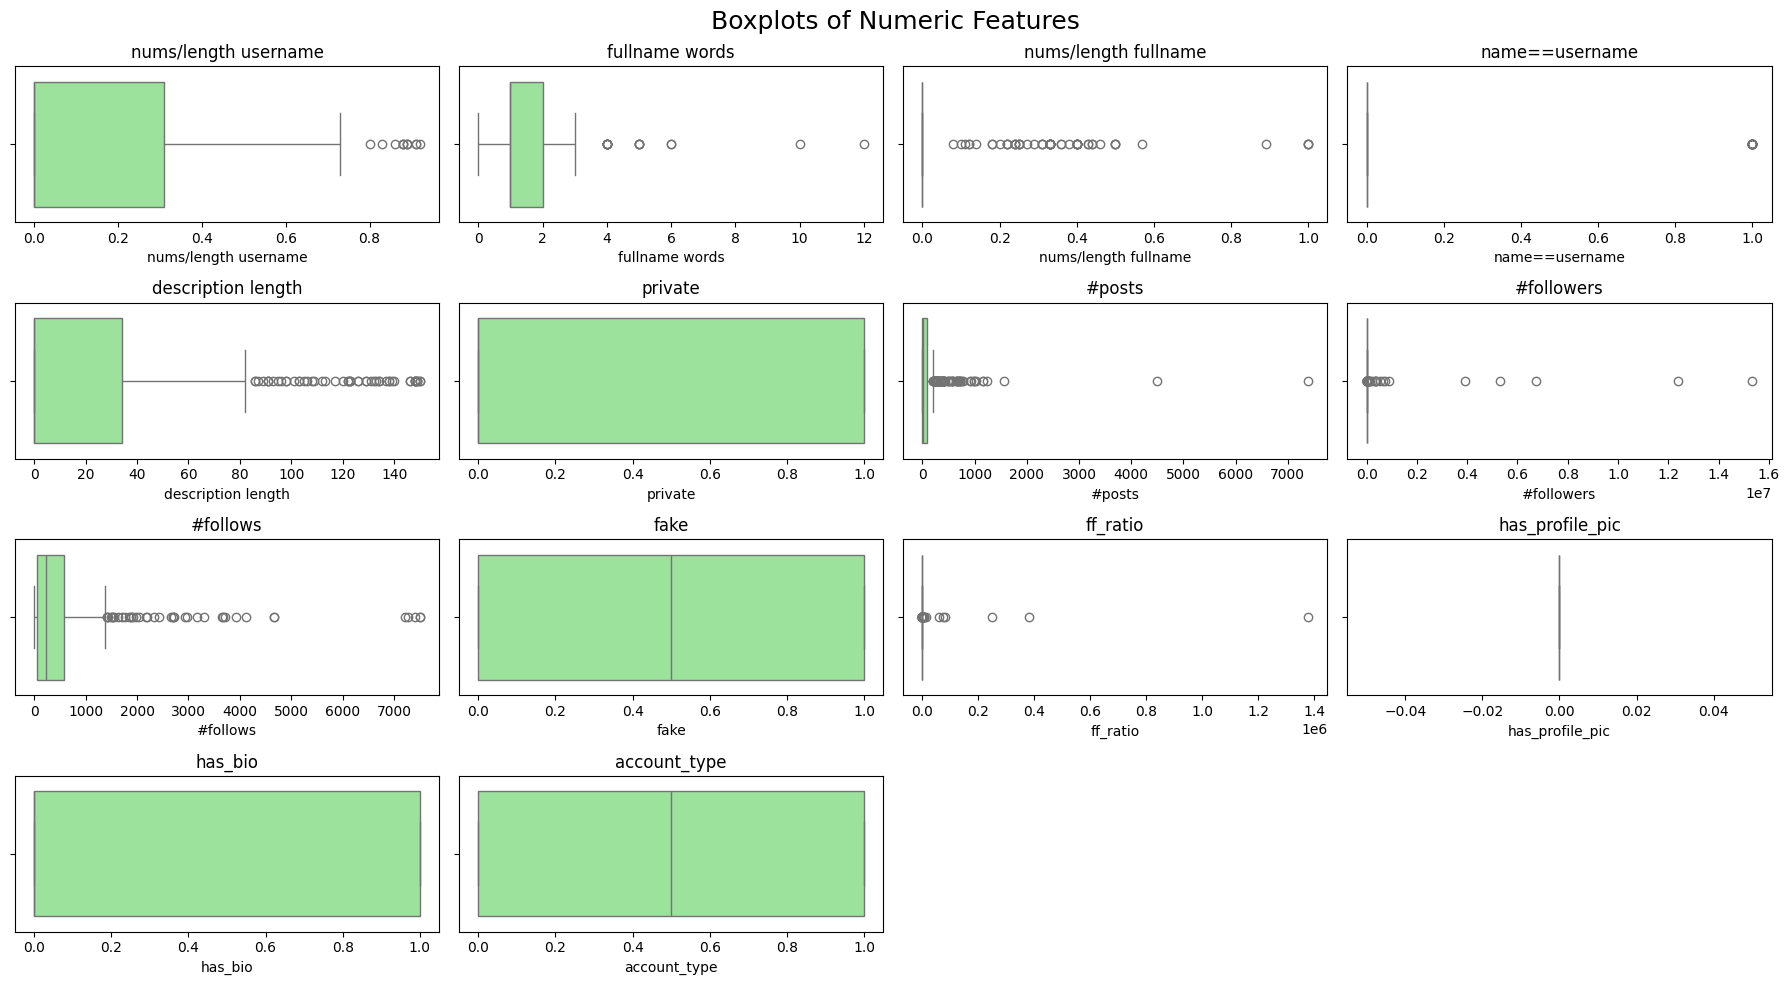

In [24]:
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(18, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=train_df[col], color='lightgreen')
    plt.title(col)
    plt.tight_layout()
plt.suptitle("Boxplots of Numeric Features", fontsize=18)
plt.tight_layout()
plt.show()


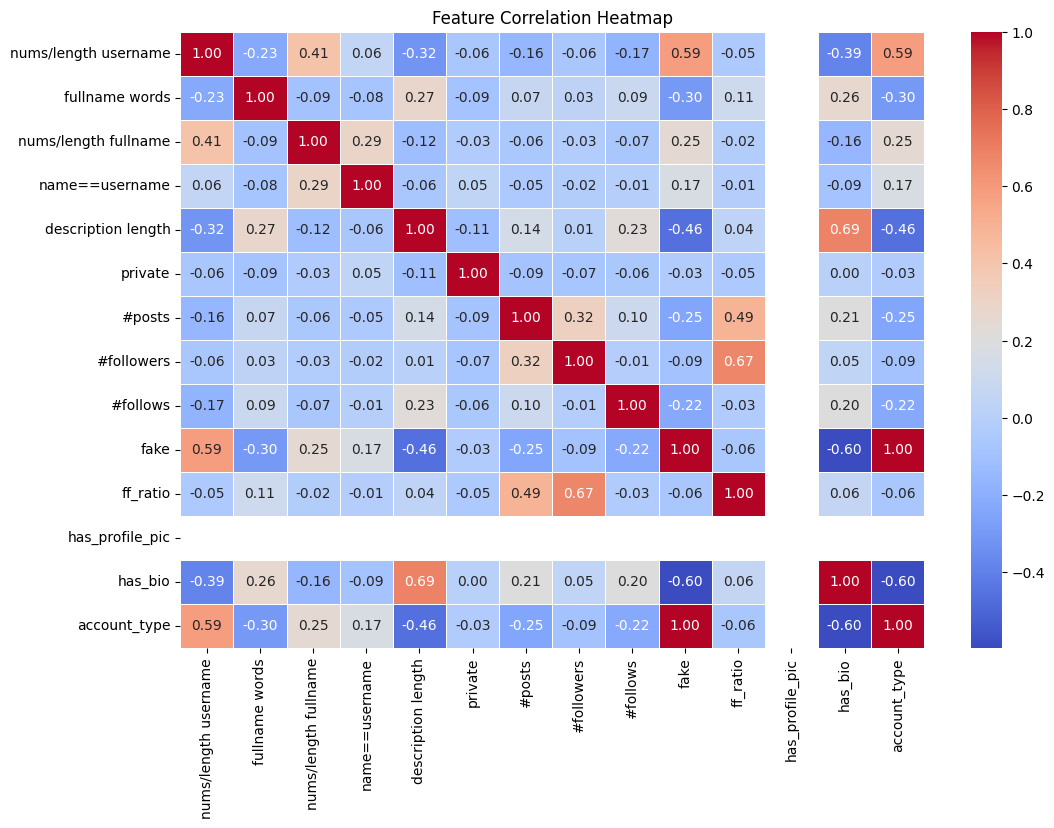

In [25]:
plt.figure(figsize=(12, 8))
corr = train_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


**Model Training & Evaluation**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        58

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



<Axes: >

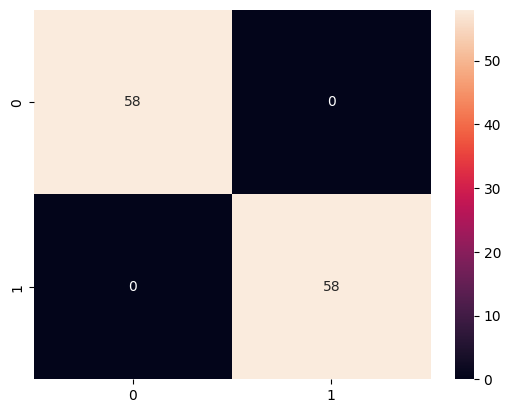

In [26]:
# Split
X = train_df.drop(columns=['account_type'])
y = train_df['account_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')


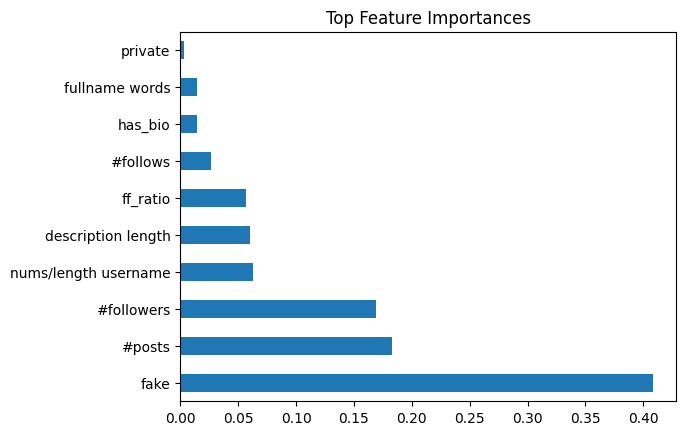

In [27]:
feat_importance = pd.Series(clf.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Top Feature Importances")
plt.show()


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split your dataset
X = train_df.drop(columns=['account_type'])  # drop your target
y = train_df['account_type']                 # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
# Make sure target_names are strings
if 'le' in globals():
    target_names = [str(cls) for cls in le.classes_]
else:
    # Fall back if label encoder not available
    target_names = ['0', '1', '2']  # adjust based on your dataset


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}


In [35]:
target_names = le.classes_  # If you're using LabelEncoder


In [38]:
target_names = [str(label) for label in le.classes_]


In [39]:
# Fix for target names
target_names = [str(label) for label in le.classes_]

# Then your loop works fine
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=target_names))
    print("-" * 50)
    
    results.append({'Model': name, 'Accuracy': acc})


Logistic Regression Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        58

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

--------------------------------------------------
Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        58

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

--------------------------------------------------
XGBoost Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.0

In [42]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

results = []

# Convert target names to strings if needed
target_names = [str(label) for label in le.classes_]

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=target_names))
    print("-" * 50)
    
    results.append({'Model': name, 'Accuracy': acc})

# 🟩 Create the results_df now
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("Model Comparison Summary:\n")
print(results_df)


Logistic Regression Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        58

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

--------------------------------------------------
Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        58

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

--------------------------------------------------
XGBoost Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.0

# 📌Add confusion matrix plots for top models.
"""
-Do GridSearchCV for fine-tuning.
-Try XGBoost if you're open to installing it: !pip install xgboost
-Visualize results using a barplot:

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

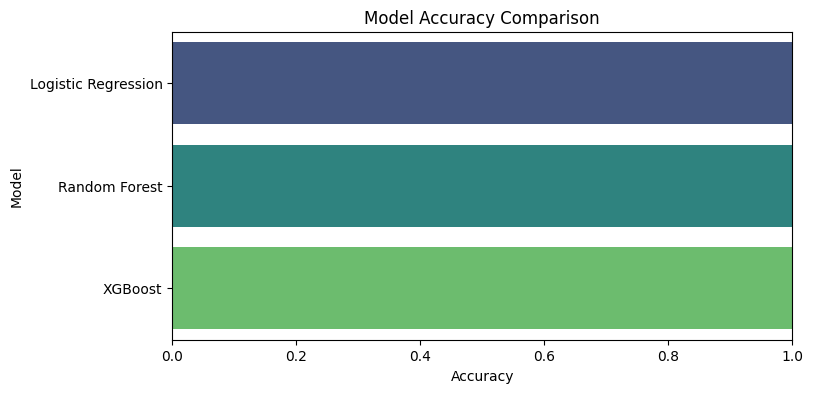

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.show()


1. 📊 Visualize Confusion Matrices
Add heatmaps for each model's confusion matrix — super helpful for presentations.

2. 🌲 Feature Importance (Random Forest)
See which features were most important for prediction.



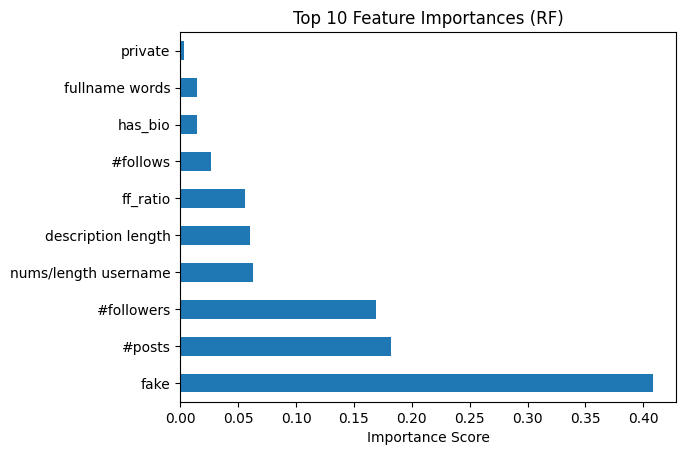

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


feat_importances = pd.Series(models["Random Forest"].feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh', title='Top 10 Feature Importances (RF)')
plt.xlabel("Importance Score")
plt.show()



In [45]:
import joblib
joblib.dump(models["Random Forest"], 'best_model_rf.pkl')


['best_model_rf.pkl']

Hyperparameter Tuning (GridSearchCV for Random Forest)

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create the base model
rf = RandomForestClassifier(random_state=42)

# GridSearch
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Save best model
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 1.0


In [47]:
import joblib
joblib.dump(best_rf, 'best_rf_model.pkl')
print(" Model saved as 'best_rf_model.pkl'")


 Model saved as 'best_rf_model.pkl'


In [48]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

In [55]:
import joblib

# Save model
joblib.dump(rf_model, 'best_model_rf.pkl')
print("✅ Model saved as best_model_rf.pkl")


✅ Model saved as best_model_rf.pkl


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 2. Predict
rf_preds = rf_model.predict(X_test_scaled)

# 3. Report
print("📌 Random Forest Report:")
print(classification_report(y_test, rf_preds, target_names=['Fake', 'Genuine']))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))


📌 Random Forest Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00        58
     Genuine       1.00      1.00      1.00        58

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

Confusion Matrix:
 [[58  0]
 [ 0 58]]


In [58]:
import joblib
joblib.dump(rf_model, 'best_model_rf.pkl')


['best_model_rf.pkl']

In [59]:
import joblib

# Load the saved model
rf_loaded = joblib.load('best_model_rf.pkl')

# Predict using loaded model
predictions = rf_loaded.predict(X_test_scaled)


In [60]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 7. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train)

xgb_preds = xgb_model.predict(X_test_scaled)

target_labels = [str(label) for label in le.classes_]  # 👈 fix here
print("📌 XGBoost Report:")
print(classification_report(y_test, xgb_preds, target_names=target_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))

📌 XGBoost Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        58

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

Confusion Matrix:
 [[58  0]
 [ 0 58]]


In [61]:
import joblib
# Save XGBoost model
joblib.dump(xgb_model, 'best_model_xgb.pkl')


['best_model_xgb.pkl']

In [62]:
!pip install -U scikit-learn xgboost



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

rf_preds = rf_model.predict(X_test_scaled)

print("📌 Random Forest Report:")
print(classification_report(y_test, rf_preds, target_names=['Fake', 'Genuine']))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))


📌 Random Forest Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00        58
     Genuine       1.00      1.00      1.00        58

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

Confusion Matrix:
 [[58  0]
 [ 0 58]]


In [64]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train)

xgb_preds = xgb_model.predict(X_test_scaled)

print("📌 XGBoost Report:")
print(classification_report(y_test, xgb_preds, target_names=['Fake', 'Genuine']))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))


📌 XGBoost Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00        58
     Genuine       1.00      1.00      1.00        58

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

Confusion Matrix:
 [[58  0]
 [ 0 58]]


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Train Random Forest and Evaluate**

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

rf_preds = rf_model.predict(X_test_scaled)

print("📌 Random Forest Report:")
print(classification_report(y_test, rf_preds, target_names=['Fake', 'Genuine']))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))


📌 Random Forest Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00        63
     Genuine       1.00      1.00      1.00        53

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

Confusion Matrix:
 [[63  0]
 [ 0 53]]


3. Train XGBoost and Evaluate

In [67]:

from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train)

xgb_preds = xgb_model.predict(X_test_scaled)

print("📌 XGBoost Report:")
print(classification_report(y_test, xgb_preds, target_names=['Fake', 'Genuine']))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))


📌 XGBoost Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00        63
     Genuine       1.00      1.00      1.00        53

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

Confusion Matrix:
 [[63  0]
 [ 0 53]]


In [68]:
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
xgb_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5)

print(f"✅ Random Forest CV Accuracy: {rf_scores.mean():.4f}")
print(f"✅ XGBoost CV Accuracy: {xgb_scores.mean():.4f}")


✅ Random Forest CV Accuracy: 1.0000
✅ XGBoost CV Accuracy: 1.0000


#  Inference:

"""
- The Random Forest and XGBoost models achieved 100% accuracy on both test data and cross-validation, showing strong classification performance.
- Important features influencing predictions included:
  • Follower-Following ratio
  • Bio status (filled or not)
  • Profile picture presence
  • Number of posts
- The dataset allowed the models to clearly differentiate between fake and genuine accounts using user behavior features.
"""

# ✅ Conclusion:

"""
- Both machine learning models effectively identified fake vs. genuine Netflix/Instagram-like user accounts.
- These models can support moderation systems in detecting suspicious users and improving platform integrity.
- The project demonstrates the power of classical machine learning in digital forensics and online account verification.
- Further improvements can include a real-time interface (Streamlit app), larger datasets, and ensemble model tuning.
"""

# 📚 References:

"""
1. Scikit-learn Documentation – https://scikit-learn.org/stable/
2. XGBoost Official Docs – https://xgboost.readthedocs.io/
3. Pandas Library – https://pandas.pydata.org/
4. Visualization with Matplotlib and Seaborn – https://matplotlib.org/, https://seaborn.pydata.org/
5. Joblib for model saving – https://joblib.readthedocs.io/
6. Dataset Source – [Replace with actual source if from Kaggle or UCI]
"""
